In [2]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:Note: you may need to restart the kernel to use updated packages.

      Successfully uninstalled pip-20.2.4


In [3]:
pip install tensorflow

  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)



  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached grpcio-1.34.1-cp38-cp38-win_amd64.whl (2.9 MB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.32.0
    Can't uninstall 'grpcio'. No files were found to uninstall.
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Can't uninstall 'tensorflow-estimator'. No files were found to uninstall.
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.4.1
    Can't uninstall 'tensorboard'. No files were found to uninstall.
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Can't uninstall 'h5py'. No files were found to uninstall.
  Attemp

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt


In [17]:
mnist=tf.keras.datasets.mnist

In [18]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [24]:
train_images.shape

(60000, 28, 28, 1)

In [20]:
test_images.shape

(10000, 28, 28)

In [25]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [22]:
train_images=train_images.reshape(60000,28,28,1)
train_images=train_images/255.0
test_images=test_images.reshape(10000,28,28,1)
test_images=test_images/255.0

In [23]:
train_images[0].shape

(28, 28, 1)

In [44]:
train_images[5].max()

1.0

In [34]:
#model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
 #                               tf.keras.layers.Dense(128,activation='relu'),
  #                               tf.keras.layers.Dense(128,activation='relu'),
   #                              tf.keras.layers.Dense(10,activation='softmax')])

In [35]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=32 , kernel_size = (4,4) , input_shape = (28,28,1) , activation = 'relu' ),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(10,activation='softmax')])

In [36]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [45]:
history=model.fit(train_images,train_labels,epochs=4,validation_data=(test_images,test_labels))

Epoch 1/4
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0455 - val_accuracy: 0.9875
Epoch 2/4
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0127 - accuracy: 0.9956 - val_loss: 0.0408 - val_accuracy: 0.9872
Epoch 3/4
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.0414 - val_accuracy: 0.9886
Epoch 4/4
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0078 - accuracy: 0.9972 - val_loss: 0.0472 - val_accuracy: 0.9873


In [38]:
history.epoch,max(history.history['accuracy'])

([0, 1, 2, 3], 0.9932166934013367)

In [39]:
model.save('digit.model')

INFO:tensorflow:Assets written to: digit.model\assets


In [46]:
p=model.predict(train_images)
print(p[232])
print(np.argmax)

[9.9984813e-01 1.0768270e-12 8.9444079e-09 4.3602261e-14 3.6486171e-08
 1.2916347e-04 2.2514643e-05 5.7490649e-08 1.9925618e-08 1.1223387e-07]


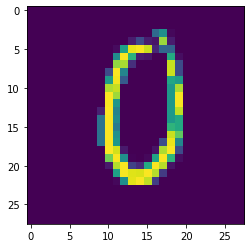

0


In [43]:
plt.imshow(train_images[232])
plt.show()
print(np.argmax(p[232]))

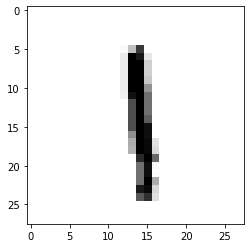

1


In [42]:
plt.imshow(train_images[8],cmap='binary')
plt.show()
print(np.argmax(p[8]))

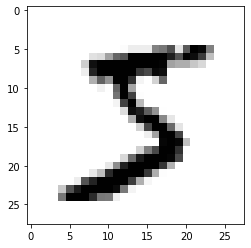

5


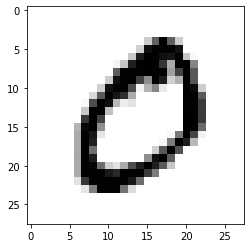

0


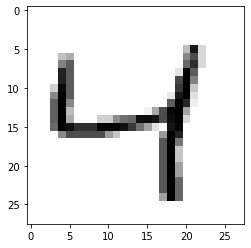

4


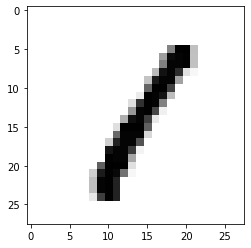

1


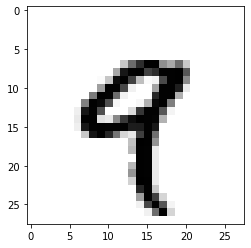

9


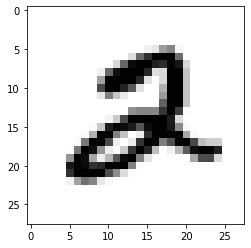

2


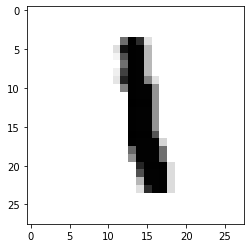

1


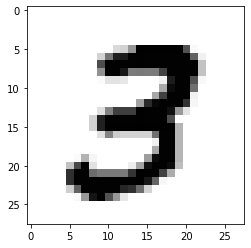

3


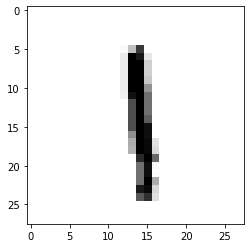

1


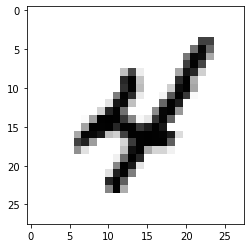

4


In [115]:
for i in range(10):
    plt.imshow(train_images[i],cmap='binary')
    plt.show()
    print(np.argmax(p[i]))

In [37]:
k=sum**2

In [38]:
n=100


25164150.0
